In [1]:
%pip install sklearn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


# Linear Regression

In [3]:
#load training data
train_data = pd.read_csv('Train.csv')

train_data = pd.get_dummies(train_data, columns=['name' ,'fuel','seller_type','transmission', 'owner']) #one-hot encoding for categorical features


X_train = train_data.drop('selling_price', axis=1)
y_train = train_data['selling_price']

In [4]:
#load testing data
test_data = pd.read_csv('Test.csv')


test_data = pd.get_dummies(test_data, columns=[ 'name', 'fuel', 'seller_type', 'transmission', 'owner']) #one-hot encoding for categorical features



In [5]:
# Align columns between training and testing data
X_train, X_test = X_train.align(test_data, join='outer', axis=1, fill_value=0)
y_test = test_data['selling_price']





## Multi-feature Equation


In [23]:
# Create and fit a StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit a Lasso Regression model
alpha = 0.01  # Adjust alpha based on your dataset
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)


################# X_tilda still needs work #################
# # Predict y using ~x for training data
# ones_column_train = np.ones((X_train.shape[0], 1))
# x_train_tilda = np.hstack((X_train, ones_column_train))
# y_pred_train = model.predict(x_train_tilda)

# # Predict y using ~x for testing data
# ones_column_test = np.ones((X_test.shape[0], 1))
# x_test_tilda = np.hstack((X_test, ones_column_test))
# y_test_pred = model.predict(x_test_tilda)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for testing data
MAE_MF = mean_absolute_error(y_test, y_test_pred)
MSE_MF = mean_squared_error(y_test, y_test_pred)
RMSE_MF = np.sqrt(MSE_MF)
r2 = r2_score(y_test, y_test_pred)

# Print the model coefficients and evaluation metrics
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, ...):", model.coef_)
print("Mean Squared Error (MSE):", MSE_MF)
print("MAE:", MAE_MF)
print("RMSE:", RMSE_MF)
print("R^2:", r2)


Intercept (b0): 638271.8077017716
Coefficients (b1, b2, ...): [-3.05397497e+04  1.54859325e+05  0.00000000e+00 ...  1.18203098e+02
 -0.00000000e+00  1.34639720e+05]
Mean Squared Error (MSE): 172367305261.575
MAE: 151758.52879854286
RMSE: 415171.41672034096
R^2: 0.48491954216082456


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.132e+13, tolerance: 5.283e+11
  model = cd_fast.enet_coordinate_descent(


## Gradient Descent


In [7]:
# Gradient Descent Approach
def gradient_descent(X, y, learning_rate, n_iterations):
    m = y.size
    theta = np.zeros(X.shape[1])
    for _ in range(n_iterations):
        gradient = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradient
    return theta

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

theta_train = gradient_descent( X_train_scaled, y_train, learning_rate=0.001, n_iterations=500)

# Create a Ridge regression object
ridge = Ridge(alpha=2.0)

# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2grad = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)



# Print the model coefficients and evaluation metrics
print("Intercept (b0):", ridge.intercept_)
print(f"Coefficients (β):: {theta_train}")
print("Mean Squared Error (MSE):", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2grad)

Intercept (b0): 638271.8077017716
Coefficients (β):: [  -7474.0432867    55886.78427344       0.         ...  127169.59244343
 -127169.59244343   92216.15817894]
Mean Squared Error (MSE): 129289850721.75423
MAE: 145719.30951818792
RMSE: 359568.9790871207
R^2: 0.6136467098405962


In [8]:
def comapreRes(maeMF, mseMF, rmseMF, mae, mse, rmse):
    print("Multi-Feature: MSE =", mseMF, "RMSE =", rmseMF, "MAE =", maeMF)
    print("Gradient Descent: MSE =", mse, "RMSE =", rmse, "MAE =", mae)

comapreRes(MAE_MF, MSE_MF, RMSE_MF, mae, mse, rmse)

Multi-Feature: MSE = 172367305261.57367 RMSE = 415171.41672033933 MAE = 151758.52879854245
Gradient Descent: MSE = 129289850721.75423 RMSE = 359568.9790871207 MAE = 145719.30951818792


# Polynomial Regression

In [9]:
## Optimize data to avoid memory error
# Select top k features
selector = SelectKBest(f_regression, k=10)
X_train_scaled_new = selector.fit_transform(X_train_scaled, y_train)
X_test_scaled_new = selector.transform(X_test_scaled)

In [1]:
# Initialize lists to store degrees and corresponding RMSE values
degrees = list(range(1, 11))
rmse_values = [0] * 10  # Preallocate with zeros

# Create a PolynomialFeatures object outside the loop
poly_features = PolynomialFeatures()

# Transform the features to polynomial features only once
X_train_poly = poly_features.fit_transform(X_train_scaled_new)
X_test_poly = poly_features.transform(X_test_scaled_new)

# Loop over degrees and calculate RMSE
for degree in degrees:
    # Create a Linear Regression object and fit the model to the training data
    poly_reg = LinearRegression().fit(X_train_poly[:, :degree + 1], y_train)  # Use only the necessary columns
    
    # Make predictions on the test set and calculate RMSE
    y_pred = poly_reg.predict(X_test_poly[:, :degree + 1])  # Use the same degree for testing
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Assign RMSE to the corresponding index in the list
    rmse_values[degree - 1] = rmse


NameError: name 'PolynomialFeatures' is not defined

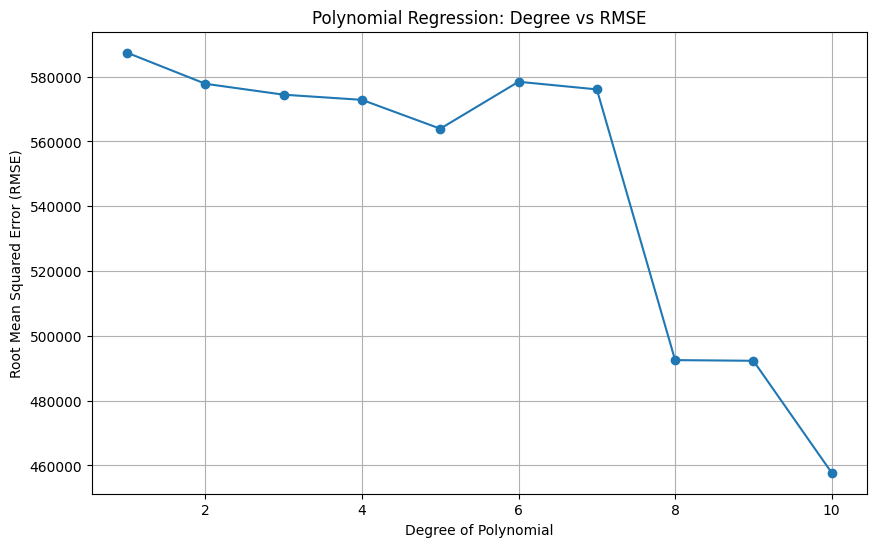

In [11]:
# Plot degree vs RMSE
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_values, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Polynomial Regression: Degree vs RMSE')
plt.grid(True)
plt.show()